In [1]:
import Pkg
Pkg.activate("../.")

using NetCDF, PyPlot, PyCall, ColorSchemes, QuadGK
import Statistics: mean

PyPlot.matplotlib.rc("text", usetex=true)
PyPlot.matplotlib.rc("xtick", labelsize=8)
PyPlot.matplotlib.rc("ytick", labelsize=8)
PyPlot.matplotlib.rc("axes", labelsize=10)    # fontsize of the x and y labels
PyPlot.matplotlib.rc("font", family="sans-serif")
PyPlot.rc("text.latex", preamble="\\usepackage[T1]{fontenc} \\renewcommand*\\familydefault{\\sfdefault}  \\usepackage{sansmath}  \\sansmath")

gspec = pyimport("matplotlib.gridspec");

Activating environment at `~/Research/EddySaturationBtBc/figures/Project.toml`


┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/navid/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [2]:
datafile = "../../data/layer2_tau1e-3_manyshortridgesCorrectTopoStartFrom5e-3.nc"
depth = circshift(ncread(datafile, "depth"), (25, 0)) #to have the ridges appear in center of channel

xh, yh = ncread(datafile, "xh"), ncread(datafile, "yh")
nx, ny = length(xh), length(yh)
Lx, Ly = 3200, 1600

xmin, ymin = minimum(xh), minimum(yh)
x = [ xh[i]-xmin+2 for i=1:nx, j=1:ny]
y = [ yh[j] for i=1:nx, j=1:ny]

dx, dy = 4e3, 4e3;

In [3]:
ρ0 = 1026.89;
Δρ = 1.201;
α = 1/950;
h = 4000.0
ρ(z) = ρ0 + Δρ*(1-exp(α*z))
z = range(0.0, stop=-4000.0, length=101)


h=4000.0
H1 = [0.0, h]
H2 = [0.0, 934.0, h]
H3 = [0.0, 730.347, 888.22+730.347, h]
H4 = [0.0, 385.65, 529.723+385.65, 848.585+529.723+385.65, h]

H = [H1, H2, H3, H4]
RHO = []

for j=1:4
    Hj = H[j]
    rho = Array{Float64}(undef, 0)
    for i=1:length(Hj)-1
        hj = Hj[i+1] - Hj[i]
        rhoj = quadgk(ρ, -Hj[i+1], -Hj[i])[1] / hj
        push!(rho, rhoj)
    end
    push!(RHO, rho)
end

ρmin, ρmax = ρ(0)-0.1, ρ(-h)+0.1;

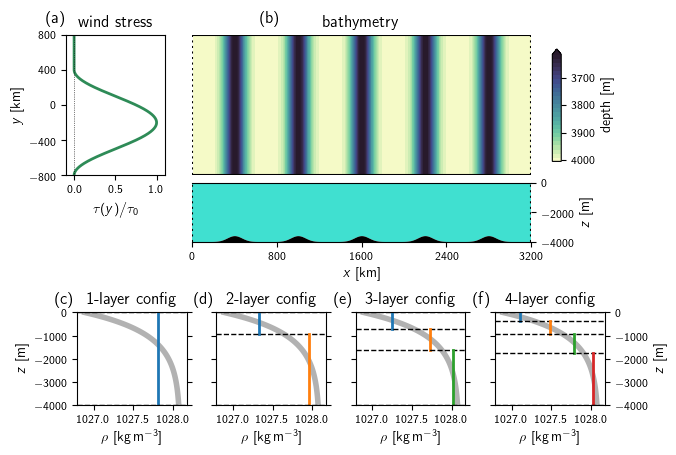

In [4]:
fig = figure(figsize=(5.5, 3.7))

gs1 = gspec.GridSpec(1, 1)
gs1.update(top=1.0, bottom=0.62, left=0, right=0.18)
ax1 = plt.subplot(get(gs1, (0, 0)))

gs2 = gspec.GridSpec(1, 1)
gs2.update(top=1.0, bottom=0.62, left=0.23, right=1)
ax2 = plt.subplot(get(gs2, (0, 0)), sharey=ax1)

gs3 = gspec.GridSpec(1, 1)
gs3.update(top=0.60, bottom=0.44, left=0.23, right=0.846)
ax3 = plt.subplot(get(gs3, (0, 0)), sharex=ax2)

gs4 = gspec.GridSpec(1, 4)
gs4.update(top=0.25, bottom=0.0, left=0.02, right=0.98, wspace=0.27)
ax4a = plt.subplot(get(gs4, (0, 0)))
ax4b = plt.subplot(get(gs4, (0, 1)))
ax4c = plt.subplot(get(gs4, (0, 2)))
ax4d = plt.subplot(get(gs4, (0, 3)))

axsrho = [ax4a, ax4b, ax4c, ax4d]

tau = circshift(ncread(datafile, "tau"), (25, 0))
ax1.plot(mean(tau, dims=1)'/maximum(tau), y[1, :]', linewidth=2, color="seagreen")
ax1.plot([0, 0], [-Ly/2, Ly/2], ":k", linewidth=0.5)
ax1.set_xlabel(L"$\tau(y)\big/\tau_0$")
ax1.set_ylabel(L"$y$ [km]")
ax1.set_title("wind stress")
ax1.set_yticks(-Ly/2:400:Ly/2)
ax1.set_xticks(0:0.5:1)
ax1.set_ylim(-Ly/2, Ly/2)
ax1.set_xlim(-0.1, 1.10)

depth = circshift(ncread(datafile, "depth"), (25, 0))
cmdepth = ColorMap(ColorSchemes.deep.colors)
im = ax2.contourf(x, y, -depth, 31, cmap=cmdepth, extend="max")
cb = colorbar(im, ax=ax2, aspect=12, shrink=0.8)
cb.set_ticks(-4000:100:-3600)
cb.set_ticklabels(["4000", "3900", "3800", "3700", "3600"])
cb.set_label("depth [m]")
ax2.set_title("bathymetry")
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_visible(false)
ax2.tick_params(right=true, labelright=false,left=true, labelleft=false, bottom=true, labelbottom=false, top=true, labeltop=false)
ax2.set_xticks([0, Lx])
ax2.plot([0, 0], [-Ly/2, Ly/2], ":k")
ax2.plot([Lx, Lx], [-Ly/2, Ly/2], ":k")
ax2.plot([0, Lx], [-Ly/2, -Ly/2], "-k")
ax2.plot([0, Lx], [Ly/2, Ly/2], "-k")
ax2.axis("off")
ax2.set_xlim(0, Lx)

ax3.fill_between([-10; x[:, 1]; 3212], [-4000; -depth[:, 1]; -4000], interpolate=true, facecolor="turquoise")
ax3.fill_between([-10; x[:, 1]; 3212], [-4000; -depth[:, 1]; -4000], -4000 .+0*[-4000; -depth[:, 1]; -4000], interpolate=true, facecolor="black")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.plot([0, 0], [-h, 0], ":k")
ax3.plot([Lx, Lx], [-h, 0], ":k")
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_visible(false)
ax3.set_ylabel(L"$z$ [m]")
ax3.set_ylim(-4000, 0)
ax3.set_xlim(0, Lx)
ax3.set_xlabel(L"$x$ [km]")
ax3.set_xticks(0:800:Lx)


ax4a.set_xticks(1027:.5:1028)
ax4a.set_yticks(-4000:1000:0)
ax4a.set_xlabel(L"$\rho$ [kg$\,$m$^{-3}$]")
ax4a.set_ylabel(L"$z$ [m]")
ax4b.set_xticks(1027:.5:1028)
ax4b.set_yticklabels("")
ax4b.set_yticks(-4000:1000:0)
ax4b.set_xlabel(L"$\rho$ [kg$\,$m$^{-3}$]")
ax4c.set_xticks(1027:.5:1028)
ax4c.set_yticklabels("")
ax4c.set_yticks(-4000:1000:0)
ax4c.set_xlabel(L"$\rho$ [kg$\,$m$^{-3}$]")
ax4d.set_xticks(1027:.5:1028)
ax4d.yaxis.tick_right()
ax4d.set_yticks(-4000:1000:0)
ax4d.yaxis.set_label_position("right")
ax4d.set_ylabel(L"$z$ [m]")
ax4d.set_xlabel(L"$\rho$ [kg$\,$m$^{-3}$]")

ax1.annotate("(a)", xy=(-0.2, 1.09), xycoords="axes fraction", fontsize=12)
ax2.annotate("(b)", xy=(+0.2, 1.09), xycoords="axes fraction", fontsize=12)
# ax3.annotate("(c)", xy=(1.25, 0.95), xycoords="axes fraction", fontsize=12)

ax4a.annotate("(c)", xy=(-0.2, 1.09), xycoords="axes fraction", fontsize=12)
ax4b.annotate("(d)", xy=(-0.2, 1.09), xycoords="axes fraction", fontsize=12)
ax4c.annotate("(e)", xy=(-0.2, 1.09), xycoords="axes fraction", fontsize=12)
ax4d.annotate("(f)", xy=(-0.2, 1.09), xycoords="axes fraction", fontsize=12)


ax = axsrho
for j=1:4
    ax[j].plot([ρmin, ρmax], -[H[j][1], H[j][1]], "--k", linewidth=1)
    ax[j].plot(ρ.(z), z, "k", linewidth=4, alpha=0.3)
    for i=1:j    
        ax[j].plot([RHO[j][i], RHO[j][i]], -[H[j][i], H[j][i+1]], "-", linewidth=2)
        ax[j].plot([ρmin, ρmax], -[H[j][i+1], H[j][i+1]], "--k", linewidth=1)
        
    end
    ax[j].set_xlim(ρmin, ρmax)
    ax[j].set_ylim(-4000, 5)
    ax[j].set_title(string(j)*"-layer config")
end

ax4a.tick_params(right=true)
ax4b.tick_params(right=true)
ax4c.tick_params(right=true)
ax4d.tick_params(left=true, right=true)

savefig("domaindensities.pdf", bbox_inches="tight");